In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from cartopy import crs as ccrs
%matplotlib inline

### Use Matplotlib: scatter
* Follow the Buzzfeed ggplot2 example. xaxis month, yaxis year stacked 
* Good trick to plot scatter plot categories: https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
* 

In [168]:
ff = "wf_all_1980_2016/wf_all_1980_2016.shp"
df = gpd.read_file(ff)

In [4]:
df.columns

Index(['ORGANIZATI', 'UNIT', 'SUBUNIT', 'SUBUNIT2', 'FIREID', 'FIRENAME',
       'FIRENUMBER', 'FIRECODE', 'CAUSE', 'SPECCAUSE', 'STATCAUSE',
       'SIZECLASS', 'SIZECLASSN', 'FIRETYPE', 'PROTECTION', 'FIREPROTTY',
       'YEAR_', 'FiscalYear', 'STARTDATED', 'CONTRDATED', 'OUTDATED', 'GACC',
       'DISPATCH', 'STATE', 'STATE_FIPS', 'FIPS', 'DLATITUDE', 'DLONGITUDE',
       'TOTALACRES', 'TRPGENCAUS', 'TRPSPECCAU', 'Cat_Field', 'DuplicateF',
       'FireName_A', 'Keep', 'Duplicate_', 'geometry'],
      dtype='object')

In [214]:
# Load data
dff=pd.DataFrame(df[['CAUSE','SPECCAUSE','SIZECLASSN','YEAR_','STARTDATED','CONTRDATED','STATE','TOTALACRES','DLONGITUDE','DLATITUDE']])

# Remove missing data
dff.dropna(inplace=True)

# Clean data
dff['STARTDATED']=pd.to_datetime(dff['STARTDATED'])
dff['CONTRDATED']=pd.to_datetime(dff['CONTRDATED'])

dff['YEAR']=pd.to_numeric(dff['YEAR_'])
dff['DATE']=dff['STARTDATED'].dt.strftime("2016-%m-%d") # this is sweet
#dff['DATE']=dff['CONTRDATED'].dt.dayofyear 



dff=dff.drop('YEAR_',axis=1)
dff=dff.drop('STARTDATED',axis=1)
dff=dff.drop('CONTRDATED',axis=1)

#major_fire=dff[dff['SIZECLASSN']>6]

In [203]:
#major_fire=dff[dff['SIZECLASSN']>5]

In [237]:
major_fire=dff[dff['SIZECLASSN']>5]

In [238]:
major_sort=major_fire.sort_values(by=['DATE'])
major_sort['DATE']=pd.to_datetime(major_sort['DATE'])

In [239]:
# Select California only

major_CA=major_sort[major_sort['STATE']=='California']
major_WA=major_sort[major_sort['STATE']=='Washington']



In [188]:
major_sort['DATE'].dt.to_pydatetime()

array([datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2017, 1, 2, 0, 0), ...,
       datetime.datetime(2017, 12, 31, 0, 0),
       datetime.datetime(2017, 12, 31, 0, 0),
       datetime.datetime(2017, 12, 31, 0, 0)], dtype=object)

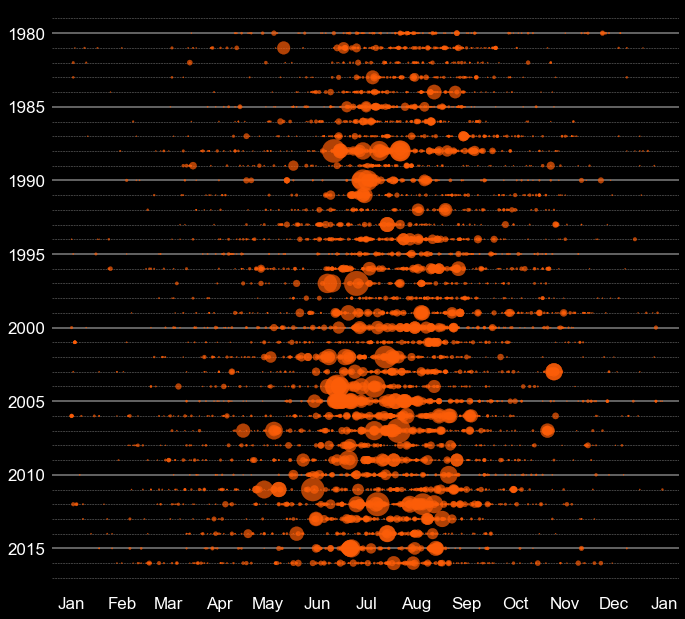

In [240]:
import matplotlib 
import matplotlib.dates as mdates
import seaborn as sns
import datetime

# Style controls
sns.set(style="white")
plt.style.use('dark_background')
#plt.style.context('Solarize_Light2')
matplotlib.rc('xtick', labelsize=17) 
matplotlib.rc('ytick', labelsize=17) 




#from pandas.plotting import _converter
#_converter.register()  # needs to override so set_xlim works with str/number


plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
#major_sort.plot.scatter(x='DATE', y='YEAR',ax=ax1);
ax.scatter(major_sort['DATE'].dt.to_pydatetime(),major_sort['YEAR'],s=major_sort['TOTALACRES']/1000,color="#FC5D08",alpha=0.7)#,s=major_fire['TOTALACRES'])
#ax.scatter(major_sort['DATE'],major_sort['YEAR'])#,s=major_fire['TOTALACRES'])



# X-axis date format
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%b')

ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_major_locator(months)

# Options
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color="gray",lw=1.5)
ax.yaxis.grid(which='minor', color="gray", lw=0.5,ls='--')
plt.minorticks_on()
ax.invert_yaxis()
ax.set_xlim([datetime.datetime(2015, 12, 20, 0, 0),datetime.datetime(2017, 1, 10, 0, 0)])

plt.savefig('major_fires_occurences_continentalUS_1980_2016.png',dpi=200)
plt.show()

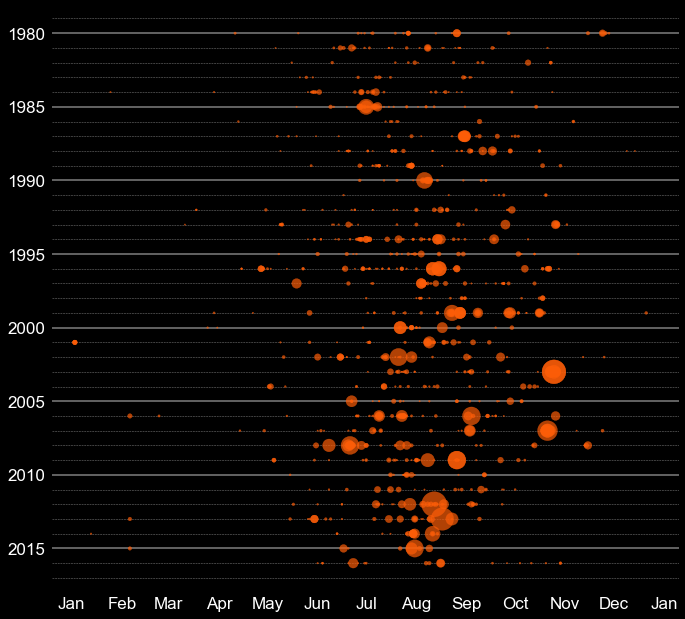

In [242]:
# California only

# Style controls
sns.set(style="white")
plt.style.use('dark_background')
#plt.style.context('Solarize_Light2')
matplotlib.rc('xtick', labelsize=17) 
matplotlib.rc('ytick', labelsize=17) 

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
#major_sort.plot.scatter(x='DATE', y='YEAR',ax=ax1);
ax.scatter(major_CA['DATE'].dt.to_pydatetime(),major_CA['YEAR'],s=major_CA['TOTALACRES']/500,color="#FC5D08",alpha=0.7)#,s=major_fire['TOTALACRES'])
#ax.scatter(major_sort['DATE'],major_sort['YEAR'])#,s=major_fire['TOTALACRES'])



# X-axis date format
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%b')

ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_major_locator(months)

# Options
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color="gray",lw=1.5)
ax.yaxis.grid(which='minor', color="gray", lw=0.5,ls='--')
plt.minorticks_on()
ax.invert_yaxis()
ax.set_xlim([datetime.datetime(2015, 12, 20, 0, 0),datetime.datetime(2017, 1, 10, 0, 0)])

plt.savefig('major_fires_occurences_CA_1980_2016.png',dpi=200)
plt.show()

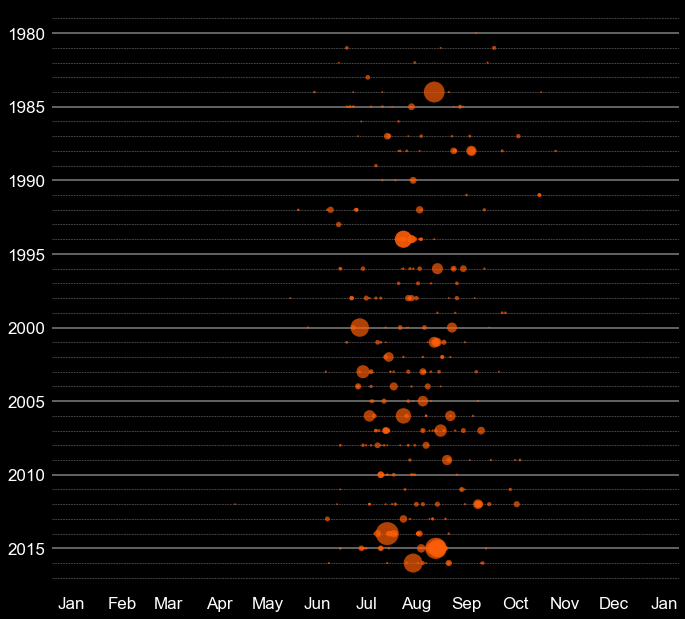

In [241]:
# Washington State only

# Style controls
sns.set(style="white")
plt.style.use('dark_background')
#plt.style.context('Solarize_Light2')
matplotlib.rc('xtick', labelsize=17) 
matplotlib.rc('ytick', labelsize=17) 

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
#major_sort.plot.scatter(x='DATE', y='YEAR',ax=ax1);
ax.scatter(major_WA['DATE'].dt.to_pydatetime(),major_WA['YEAR'],s=major_WA['TOTALACRES']/500,color="#FC5D08",alpha=0.7)#,s=major_fire['TOTALACRES'])
#ax.scatter(major_sort['DATE'],major_sort['YEAR'])#,s=major_fire['TOTALACRES'])



# X-axis date format
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%b')

ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_major_locator(months)

# Options
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color="gray",lw=1.5)
ax.yaxis.grid(which='minor', color="gray", lw=0.5,ls='--')
plt.minorticks_on()
ax.invert_yaxis()
ax.set_xlim([datetime.datetime(2015, 12, 20, 0, 0),datetime.datetime(2017, 1, 10, 0, 0)])

plt.savefig('major_fires_occurences_WA_1980_2016.png',dpi=200)
plt.show()

In [243]:
### Separate into cause of fires


### Use Altair: https://altair-viz.github.io/gallery/natural_disasters.html